<a href="https://colab.research.google.com/github/JovanaTunic/PPPO/blob/main/Detekcija_lica_IT3_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predmet: Principi prezentacije i prepoznavanja oblika

Tema projekta: Detekcija lica

Student: IT3/2020 - Jovana Tunić  

---

# **Sadržaj**

1. Uvod
2. Set podataka
3. Open CV
4. Detekcija lica - Histogram orijentisanih gradijenata (HOG)
5. Detekcija lica - Haar Cascade
6. Detekcija lica - MTCNN
7. Prepoznavanje lica - Face Recognition
8. Rezultati i diskusija
9. Zaključak
10. Literatura


# **Uvod**

U eri digitalne transformacije, tehnologije mašinskog učenja i kompjuterske vizije igraju ključnu ulogu u našem svakodnevnom životu. Mašinsko učenje predstavlja granu veštačke inteligencije koja omogućava računarima da uče iz podataka i primenjuju naučene veze na rešavanje problema, dok kompjuterska vizija omogućava računarima da analiziraju i razumeju vizuelne informacije.

**Mašinsko učenje**

Mašinsko učenje omogućava računarima da automatski poboljšavaju svoje performanse kroz iskustvo. Ključni elementi mašinskog učenja uključuju algoritme koji se koriste za identifikaciju uzoraka u podacima, kao i tehnike optimizacije koje se koriste za podešavanje parametara modela radi maksimiziranja performansi. Ova disciplina ima široku primenu u različitim oblastima, uključujući prepoznavanje govora, analizu teksta, predikciju, preporuke i još mnogo toga.

**Kompjuterska vizija**

Kompjuterska vizija se bavi analizom, interpretacijom i razumevanjem vizuelnih podataka, kao što su slike i video zapisi. Ova disciplina omogućava računarima da izvode zadatke koji zahtevaju percepciju i razumevanje vizuelnog sveta, uključujući detekciju objekata, prepoznavanje lica, segmentaciju slika, praćenje pokreta i još mnogo toga.

Tako dolazimo i do same teme ovog projekta, a to je detekcija lica.

**Detekcija lica**

Detekcija lica je specifičan zadatak u okviru domena detekcije objekata. Uključuje otkrivanje lica na slici ili video snimku i njihovo lokalizovanje crtanjem graničnih okvira oko njih.
Algoritmi za detekciju lica obično koriste kombinaciju izdvajanja karakteristika, predloga objekata i klasifikaciju da identifikuju i lokalizuju lica na slici. Cilj detekcije lica jeste da pronađe sva lica na slici i vrati njihove granične okvire, koji se zatim mogu koristiti za različite zadatke kao što su prepoznavanje lica, detekcija crta na licu i procena položaja glave. Detekcija lica je evoluirala od ranijih tehnika kompjuterske vizije do naprednih metoda mašinskog učenja i dubokog učenja, što je rezultiralo kontinuiranim poboljšanjem tačnosti i performansi.
Algoritmi za detekciju lica fokusiraju se na prepoznavanje frontalnih ljudskih lica na slici. Ova detekcija je analogna tome da se slika postepeno upoređuje sa slikom lica. Međutim, detekcija lica je izazovna zbog mnogih promenljivih, kao što su položaj, izraz, orijentacija, boja kože, prisustvo naočara, osvetljenje i rezolucija slike. Osnovni cilj algoritma za detekciju lica je da utvrdi postoji li lice na slici ili ne.
Detekcija lica je često prvi korak u različitim aplikacijama kao što su video nadzor, praćenje lica, prepoznavanje emocija i druge.

Važno je napomenuti da postoji razlika između detekcije lica (face detection) i prepoznavanja lica (face recognition). Prepoznavanje lica ide korak dalje od detekcije lica, omogućavajući identifikaciju konkretnih lica na osnovu njihovih karakteristika ili osobina.

Postoji nekoliko različitih metoda i tehnika koje se koriste za rešavanje problema detekcije lica u oblasti kompjuterske vizije:

 •Viola-Jones detektor

 •Histogram orijentisanih gradijenata (HOG)

 •Lokalni binarni obrasci (LBP)

 •MTCNN (Multi-task Cascaded Convolutional Neural Network)

 •MediaPipe Face Detection

 •OpenCV (HaarCascade)

 •Face recognition


U okviru ovog projekta biće prikazani i upoređeni sledeći modeli: HOG, MTCNN, HaarCascade i Face Recognition.


# **Set podataka**

Za potrebe ovog rada korišćen je dataset koji se sastoji iz fotografija različitih glumaca filma Avengers. U 5 foldera nalaze se 274 fotografije poznatih glumaca. Fotografije su raspoređene po folderima sa imenom i prezimenom glumca. Fotografije sledećih glumaca korišćene su u nastavku projekta:

•Chris Evans

•Chris Hemsworth

•Mark Ruffalo

•Robert Downey Jr.

•Scarlett Johansson




In [ ]:
#Instalacija gdown biblioteke
# gdown biblioteka je alat za jednostavno preuzimanje datoteka sa Google Drive-a
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
# Uvoz gdown modula
import gdown

In [ ]:
# preuzimanje datoteke sa Google Drive-a
!gdown --fuzzy https://drive.google.com/file/d/1Tn4MaQMtYuu0iQq6XCVDWLpWrrdY8FiQ/view?usp=drive_link

Downloading...
From (original): https://drive.google.com/uc?id=1Tn4MaQMtYuu0iQq6XCVDWLpWrrdY8FiQ
From (redirected): https://drive.usercontent.google.com/download?id=1Tn4MaQMtYuu0iQq6XCVDWLpWrrdY8FiQ&confirm=t&uuid=ee1e233a-85e1-4ba9-83a1-ba1eeb048597
To: /content/AVENGERS_FaceDetection.zip
100% 58.6M/58.6M [00:04<00:00, 13.3MB/s]


In [ ]:
#Raspakivanje datoteke sa slikama glumaca
!unzip AVENGERS_FaceDetection.zip

Archive:  AVENGERS_FaceDetection.zip
   creating: AVENGERS_FaceDetection/cropped_images/
   creating: AVENGERS_FaceDetection/cropped_images/chris_evans/
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans1.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans10.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans11.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans12.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans13.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans14.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans15.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans16.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans17.png  
  inflating: AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans18.png  
  inflating: AVENG

# **Open CV**


OpenCV (Open Source Computer Vision Library) je popularna biblioteka otvorenog koda koja pruža različite alate i funkcije za obradu slika, računarski vid, analizu videa i druge zadatke vezane za vizuelnu obradu podataka.
Pruža širok spektar funkcionalnosti za rad sa slikama i videom, uključujući učitavanje i čuvanje slika i videa, manipulaciju slikama (npr. skaliranje, rotacija, promena osvetljenja), izdvajanje regiona interesa (ROI), promena boja i kontrasta, kao i mnoge druge.

Biblioteka ima više od 2500 optimizovanih algoritama, što uključuje sveobuhvatan skup klasičnih i najsavremenijih algoritama kompjuterskog vida i mašinskog učenja. Ovi algoritmi se mogu koristiti za otkrivanje i prepoznavanje lica, identifikaciju objekata, klasifikovanje ljudskih radnji u video zapisima, praćenje kretanja kamere, praćenje objekata u pokretu, izdvajanje 3D modela objekata, proizvodnju 3D oblaka tačaka sa stereo kamera, spajanje slika kako bi se proizvela visoka rezolucija sliku cele scene, pronalazak slične slike iz baze podataka slika, uklanjanje crvenih očiju sa slika snimljenih korišćenjem blica, praćenje pokreta očiju, prepoznavanje pejzaža i postavljanje markera koji će ga prekriti proširenom stvarnošću, itd. OpenCV ima više od 47 hiljada ljudi korisnika zajednice i procenjeni broj preuzimanja veći od 18 miliona. Biblioteka se u velikoj meri koristi u preduzećima, istraživačkim grupama i od strane državnih organa.

OpenCV je dostupan na različitim platformama, uključujući Windows, Linux, macOS, iOS i Android, što ga čini fleksibilnim alatom za razvoj softvera u različitim okruženjima. Implementiran u C++ sa dodatnom podrškom za Python, Java, MATLAB i druge programski jezike.
Python je posebno popularan jezik za rad sa OpenCV-om zbog jednostavnosti korišćenja i široke podrške za različite funkcionalnosti biblioteke.


# **Detekcija lica - Histogram orijentisanih gradijenata(HOG)**

HOG (Histogram of Oriented Gradients) je tehnika za detekciju objekata u digitalnim slikama, često korištena za detekciju lica. Razvijena je 2005. godine od strane Navneeta Dalala i Bill Triggsa. HOG je pouzdan za detekciju objekata jer se zasniva na analizi distribucije gradijenta lokalnog intenziteta i pravca ivica kako bi opisao oblik objekta, tj. kako se intenzitet piksela menja u različitim smerovima.

Osnovna ideja HOG-a sastoji se u razdvajanju slike na manje povezane ćelije. Zatim se za svaku ćeliju izračunava histogram. Nakon toga, svi ovi histogrami se kombinuju kako bi se formirali vektori karakteristika, stvarajući jedinstveni histogram koji je specifičan za svako lice. Jedini nedostatak ovog pristupa za detekciju lica je njegova ograničenost na ravna i frontalna lica; ne može efikasno raditi sa licima koja su okrenuta pod neparnim uglovima. Ova tehnika je korisna kada je potrebno otkriti lica na skeniranim dokumentima kao što su vozačke dozvole i pasoši, ali nije idealna za analizu video materijala u stvarnom vremenu. Zato se često koristi u kombinaciji s drugim metodama kao što su HaarCascade ili duboke neuronske mreže za bolje rezultate u detekciji lica u različitim uslovima osvetljenja, položaja i izraza lica.


Detected faces in mark_ruffalo17.png: 1
Execution time for mark_ruffalo17.png: 0.10 seconds


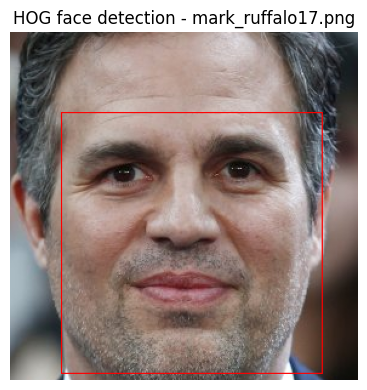

Detected faces in chris_evans25.png: 1
Execution time for chris_evans25.png: 0.68 seconds


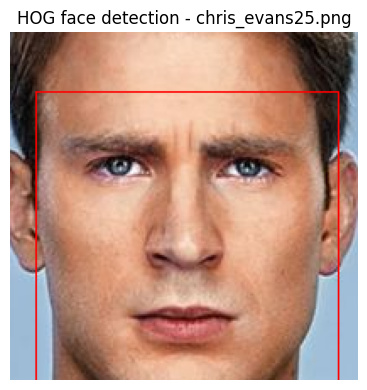

Detected faces in chris_hemsworth25.png: 1
Execution time for chris_hemsworth25.png: 1.05 seconds


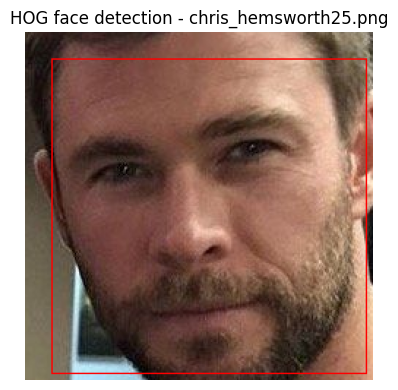

Detected faces in scarlett_johansson29.png: 1
Execution time for scarlett_johansson29.png: 1.28 seconds


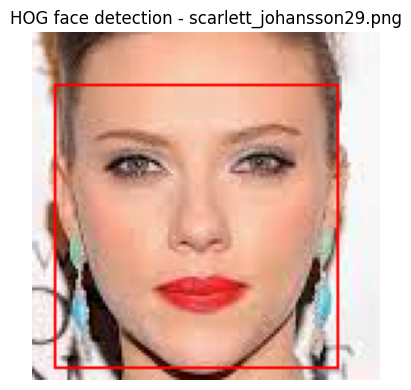

Detected faces in robert_downey_jr42.png: 1
Execution time for robert_downey_jr42.png: 1.64 seconds


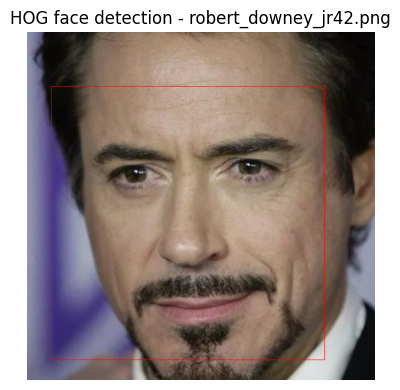

In [ ]:
#OpenCV obrada slika
import cv2
#HOG detektor
import dlib
#prikazivanje slika
import matplotlib.pylab as plt
#vreme
import time
import os


# Putanja do foldera sa slikama
folder_path = 'AVENGERS_FaceDetection/cropped_images/test_slike'

# Inicijalizacija HOG detektora
hog = dlib.get_frontal_face_detector()

# Pocetno vreme pokretanja
start_time = time.time()

# Iteracija kroz sve slike u folderu
for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Ucitavanje slike i konverzija iz BGR u RGB format
        image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, filename)), cv2.COLOR_BGR2RGB)

        # Detekcija lica bez upsamplovanja
        faces = hog(image, 0)

        # Ispis broja detektovanih lica i vremena izvrsavanja
        print(f"Detected faces in {filename}: {len(faces)}")
        print(f"Execution time for {filename}: {time.time() - start_time:.2f} seconds")

        # Crtanje pravougaonika oko svih detektovanih lica
        for f in faces:
            left = f.left()
            top = f.top()
            right = f.right()
            bottom = f.bottom()

            image = cv2.rectangle(image,(left,top),(right,bottom),(255,0,0),1)

        # Prikazivanje rezultata sa pravougaonicima
        plt.figure(figsize=(8,4)) #figsize=(10, 5) određuje veličinu slike, gde je 10 širina slike u inčima, a 5 visina slike u inčima.
        plt.imshow(image)
        plt.axis('off') # Ova linija koda isključuje oznake osa na slici.
        plt.title(f"HOG face detection - {filename}")
        plt.tight_layout()
        plt.show()  #Ova linija koda prikazuje celu sliku sa svim postavljenim elementima

# **Detekcija lica - Haar Cascade**

Haar Cascade je tehnika za detekciju objekata u digitalnim slikama koja se oslanja na analizu osnovnih vizualnih karakteristika objekata, poznatih kao Haar features. Razvio ju je Paul Viola i Michael Jones 2001. godine, a od tada je postala popularna metoda za detekciju različitih objekata, uključujući lica, automobile, oči i druge objekte od interesa.
Ono što Haar Cascades čini posebnim je njegova kaskadna struktura klasifikatora. Umesto da analizira svaki piksel na slici, algoritam koristi niz klasifikatora organizovanih u kaskadu. Svaki klasifikator je sve precizniji u prepoznavanju potencijalnih objekata. Ako određeni deo slike ne pređe prag odlučivanja određenog klasifikatora, taj deo se brzo odbacuje kao da ne sadrži objekat, što omogućava brzu i efikasnu detekciju.

Ovaj kod koristi OpenCV biblioteku za detekciju lica, očiju i osmeha na digitalnoj slici. Počinje uvozom potrebnih biblioteka, uključujući OpenCV, i učitavanjem prethodno obučenih klasifikatora za ove karakteristike. Zatim se odabrana slika konvertuje u crno-belu boju radi bolje obrade.

Nakon toga, primenjuje se detekcija lica na slici pomoću funkcije **face_cascade.detectMultiScale**, koja označava pronađena lica **crvenim** pravougaonicima. Za svako prepoznato lice, algoritam koristi funkciju **eye_cascade.detectMultiScale** za pronalaženje očiju i **smile_cascade.detectMultiScale** za pronalaženje osmeha, a zatim označava oči **zelenim**, a osmeh **plavim** pravougaonicima. Na kraju, rezultat se prikazuje korisniku sa vizuelnim indikacijama prepoznatih lica, očiju i osmeha na slici.

Haar Cascade ne može da funkcioniše sa kompleksnijim objektima, neke od nedostataka su: Niža preciznost u odnosu na moderne detektore objekata, veći broj grešaka i potreba za ručnim podešavanjem parametara.

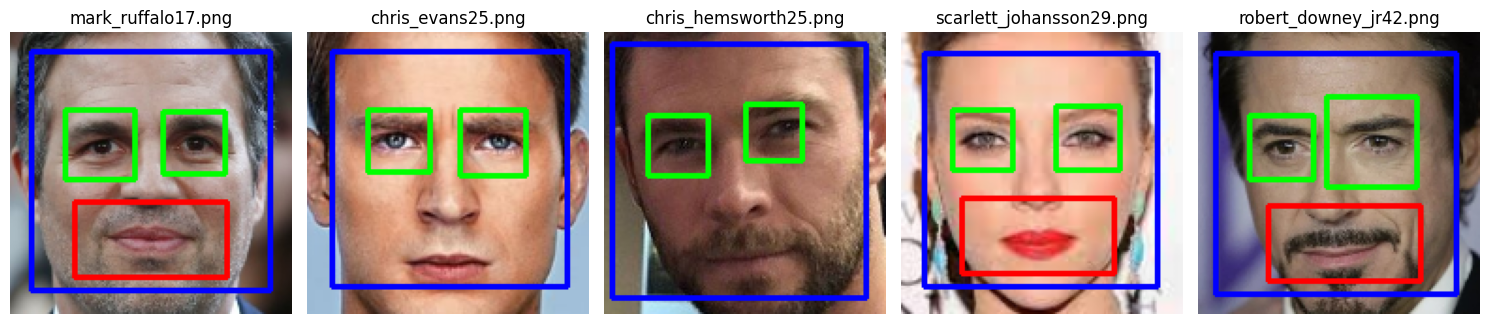

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Učitavanje klasifikatora lica, oka i osmeha
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

# Folder sa slikama
folder_path = 'AVENGERS_FaceDetection/cropped_images/test_slike'
# Lista imena slika
image_files = os.listdir(folder_path)
# Postavljanje željene veličine slika
desired_size = (150, 150)

# Postavljanje broja kolona za prikaz slika
num_columns = 5
# Računanje broja redova
num_rows = -(-len(image_files) // num_columns)  # Ceiling division to get the smallest integer greater than or equal to the division result

# Podešavanje veličine slike u zavisnosti od broja redova i kolona
plt.figure(figsize=(15, 4*num_rows))

# Prolazak kroz svaku sliku
for i, image_file in enumerate(image_files):
    # Učitavanje slike
    img = cv2.imread(os.path.join(folder_path, image_file))
    # Prilagođavanje veličine slike
    img = cv2.resize(img, desired_size)
    # Konvertovanje slike u sivu boju
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detektovanje lica
    faces = face_cascade.detectMultiScale(gray, 1.1, 1)

    # Prolazak kroz sva lica i crtanje pravougaonika
    for (x, y, z, u) in faces:
        cv2.rectangle(img, (x, y), (x+z, y+u), (255, 0, 0), 2)
        roi_gray = gray[y:y+u, x:x+z]
        roi_color = img[y:y+u, x:x+z]

        # Detektovanje očiju i crtanje pravougaonika oko levog i desnog oka
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.05, 10)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        # Detektovanje osmeha i crtanje pravougaonika oko njega
        smile = smile_cascade.detectMultiScale(roi_gray, 1.5, 5)
        for (mx,my,mw,mh) in smile:
            cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

    # Prikaz rezultata
    plt.subplot(num_rows, num_columns, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(image_file)

plt.tight_layout()
plt.show()

# **Detekcija lica - MTCNN**

MTCNN (Višezadatna kaskadna konvolucijska neuronska mreža) sastoji se od tri konvolucijske neuronske mreže. Rezultati svake mreže se modifikuju i predstavljaju kao ulaz za narednu mrežu. Ovaj proces se naziva formiranje piramide slika, što pomaže u budućoj obradi okvira objekata. Tri mreže koje čine ovaj model su:

***P-net*** je skraćeni naziv za prvu mrežu MTCNN modela koja se naziva Predložna mreža(engl. Proposal network). Zadatak ove mreže je da odredi gde na slici se nalaze objekti. Rezultat ove mreže je veliki broj okvira na slici koji pokazuju i na tačno i netačno identifikovane objekte. Svi okviri koji pokazuju na isti objekt se pronalaze i spajaju u jedan okvir pomoću NMS algoritma.

***R-net*** mreža je druga mreža MTCNN modela i naziva se pročišćavajuća mreža (engl. Refine network). Ulaz ove mreže predstavljaju spojeni okviri koji su rezultat prve, P-net mreže. Zadatak druge mreže je dodatno filtriranje loših objekata i kalibracija okvira. Izlaz koji pruža ova mreža je manji broj okvira koji uglavnom pokazuju na većinski tačne identifikovane objekte. Kao i kod prve mreže, korišćenjem NMS algoritma svi okviri koji pokazuju na isti objekt se spajaju.

***O-net*** (eng. Output network) je izlazna mreža i posljednja, odnosno treća mreža modela. Funkcionalnost joj je ista kao i kod druge mreže, s tim što izlaz predstavlja 5 ključnih tačaka lica identifikovanih na fotografiji (oči, vrh nosa, levi i desni kraj usta). Identifikovane tačke biće prikazane na narednom primeru.

Ovaj model postiže odlične rezultate detekcije objekata u stvarnom vremenu. Na narednom primeru, prikazano je korišćenje ovog modela prilikom detekcije lica na fotografijama. Važno je napomenuti da se osim lica, model može koristiti i za detekciju drugih objekata.

In [ ]:
# Instaliranje odgovarajuće biblioteke
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.7 MB/s eta 0:00:00


In [ ]:
# Preuzimanje potrebnih modela
import mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

In [ ]:
# Definisanje funkcije za detekciju lica kojoj se prosleđuje fotografija
def detect_face(image):
    detector = MTCNN()
    bounding_boxes = detector.detect_faces(image)
    return bounding_boxes

# Definisanje funkcije za crtanje pravougaonika oko detektovanog lica
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x1, y1, w, h = box['box']
        cv2.rectangle(image, (x1, y1), (x1+w,y1+h), (0,0,255), 2)

# Definisanje funkcije za crtanje detektovanih tačaka na lici
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 2, (0,0,255), 2)

1/1 [==============================] - 0s 264ms/step
Koordinate detektovanih tačaka na slici mark_ruffalo17.png: 
[{'box': [24, 5, 217, 269], 'confidence': 0.9999972581863403, 'keypoints': {'left_eye': (91, 116), 'right_eye': (191, 113), 'nose': (143, 162), 'mouth_left': (97, 209), 'mouth_right': (188, 207)}}]
1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 127ms/step
Koordinate detektovanih tačaka na slici chris_evans25.png: 
[{'box': [12, 0, 168, 212], 'confidence': 0.9994204044342041, 'keypoints': {'left_eye': (63, 76), 'right_eye': (138, 78), 'nose': (104, 127), 'mouth_left': (71, 167), 'mouth_right': (134, 168)}}]
1/1 [==============================] - 0s 260ms/step
Koordinate detektovanih tačaka na slici chris_hemsworth25.png: 
[{'box': [2, 0, 225, 255], 'confidence': 0.9999986886978149, 'keypoints': {'left_eye': (60, 94), 'right_eye': (154, 79), 'nose': (108, 145), 'mouth_left': (87, 196), 'mouth_right': (162, 185)}}]
1/1 [==============================] - 0s 145ms/step
Koordinate detektovanih tačaka na slici scarlett_johansson29.png: 
[{'box': [17, 0, 92, 121], 'confidence': 0.999563992023468, 'keypoints': {'left_eye': (38, 48), 'right_eye': (83, 47), 'nose': (61, 73), 'mouth_left': (44, 93), 'mouth_right': (80, 93)}}]
1/1 [==============================] - 0s 259ms/step
Koordinate detekto

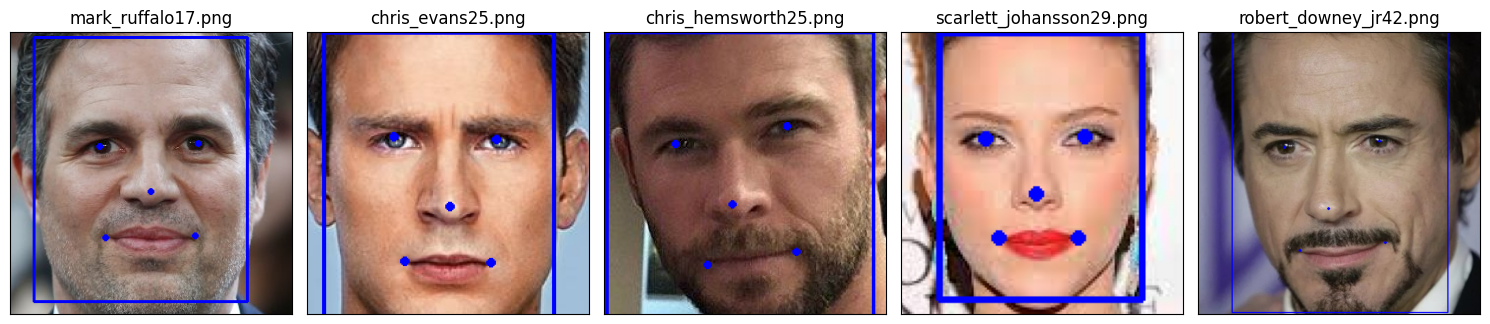

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Putanja do foldera sa slikama
folder_path = "AVENGERS_FaceDetection/cropped_images/test_slike"
# Postavljanje željene veličine slika
desired_size = (150, 150)

# Postavljanje broja kolona za prikaz slika
num_columns = 5
# Računanje broja redova
num_rows = -(-len(image_files) // num_columns)  # Ceiling division to get the smallest integer greater than or equal to the division result

# Podešavanje veličine slike u zavisnosti od broja redova i kolona
plt.figure(figsize=(15, 4*num_rows))

# Iteracija kroz sve slike u folderu
for i, filename in enumerate(os.listdir(folder_path)):
    # Provera da li je fajl slika (završava se na .png ili .jpg)
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Učitavanje slike i konverzija iz BGR u RGB format
        image = cv2.cvtColor(cv2.imread(os.path.join(folder_path, filename)), cv2.COLOR_BGR2RGB)

        # Provjera rada prve (detect_face) funkcije
        bboxes = detect_face(image)

        # Crtanje pravougaonika na detektovanom licu fotografije
        draw_bounding_boxes(image, bboxes)

        # Ispis koordinata detektovanih tačaka
        print(f"Koordinate detektovanih tačaka na slici {filename}: \n{bboxes}")

        # Dobijeni odgovor predstavlja koordinate dobijenih tačaka - identifikovani pravougaonik i pet tačaka

        # Crtanje pet detektovanih tačaka (lijevo oko, desno oko, nos, lijevi ugao usana, desni ugao usana)
        mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
        mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
        mark_key_point(image, bboxes[0]['keypoints']['nose'])
        mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
        mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])

        # Prikaz fotografije sa rezultatima
        plt.subplot(num_rows, num_columns, i+1)
        plt.imshow(image)
        plt.title(filename)
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

# **Prepoznavanje lica - Face Recognition**

Prepoznavanje lica je osnovna sposobnost prepoznavanja osoba na temelju slika njihovih lica. U poslednjih nekoliko decenija, ova tehnologija postala je popularna zahvaljujući razvoju metoda i visokom kvalitetu kamera. Sistemi za prepoznavanje lica su tehnologije koje mogu uporediti ljudsko lice na digitalnoj slici ili video snimku s bazom podataka lica. Ovo se često koristi za autentifikaciju korisnika putem identifikacije, preciziranja karakteristika lica na slici itd.

Prednosti ove tehnologije uključuju mogućnost suzbijanja nelegalnih aktivnosti, dok nedostatak leži u zabrinutosti za privatnost. Sistemi za prepoznavanje lica variraju u svojoj sposobnosti da identifikuju ljude u teškim uslovima, kao što su loše osvetljenje i niska rezolucija.

Prepoznavanje lica, odnosno osoba na identifikovanim licima fotografije predstavlja jednu od najjednostavnijih biblioteka za proces detekcije lica. Alati iz ove biblioteke su nastali kao napor za prevazilaženje nedostataka klasičnih i modernih pristupa pri detekciji lica. Alati iz ove biblioteke napravljeni su korišćenjem dlib-ovih najsavremenijih alata za prepoznavanje lica.Modeli kao što je dlib-ov najsavremeniji sistem za prepoznavanje lica, izgrađen na dubokom učenju (CNN ili konvolucione neuronske mreže), može postići tačnost od 99,38%.


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=7fe0ad35088605971e641deeb731a4397839d0c8ddec7785d5aacd04a9c0f3d8
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition #Jednostavna biblioteka za detekciju i prepoznavnje lica.

In [ ]:
import os
import shutil
#import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

#Primer prepoznavanja više lica na jednoj slici i iscrtavanje pravougaonika oko lica svake identifikovane osobe

#Učitavanje slike i učenje kako da prepozna osobu
robert_picture = face_recognition.load_image_file('AVENGERS_FaceDetection/cropped_images/robert_downey_jr/robert_downey_jr41.png')
robert_face_encoding = face_recognition.face_encodings(robert_picture) [0]

#Učitavanje slike druge osobe
scarlett_picture = face_recognition.load_image_file('AVENGERS_FaceDetection/cropped_images/scarlett_johansson/scarlett_johansson23.png')
scarlett_face_encoding = face_recognition.face_encodings(scarlett_picture) [0]

#Učitavanje slike treće osobe
chris_picture = face_recognition.load_image_file('AVENGERS_FaceDetection/cropped_images/chris_evans/chris_evans5.png')
chris_face_encoding = face_recognition.face_encodings(chris_picture) [0]

#Učitavanje slike četvrte osobe
chris_h_picture = face_recognition.load_image_file('AVENGERS_FaceDetection/cropped_images/chris_hemsworth/chris_hemsworth4.png')
chris_h_face_encoding = face_recognition.face_encodings(chris_h_picture) [0]

#Učitavanje slike pete osobe
mark_picture = face_recognition.load_image_file('AVENGERS_FaceDetection/cropped_images/mark_ruffalo/mark_ruffalo43.png')
mark_face_encoding = face_recognition.face_encodings(mark_picture) [0]

#Pravljenje niza poznatih lica i učenje njihovih imena
known_face_encodings = [
    robert_face_encoding,
    scarlett_face_encoding,
    chris_face_encoding,
    chris_h_face_encoding,
    mark_face_encoding
]
known_face_names = [
    "Robert Downey",
    "Scarlett Johansson",
    "Chris Evans",
    "Chris Hemsworth",
    "Mark Ruffalo"
]
#Prikay koliko lica je poynato
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 5 images.


<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


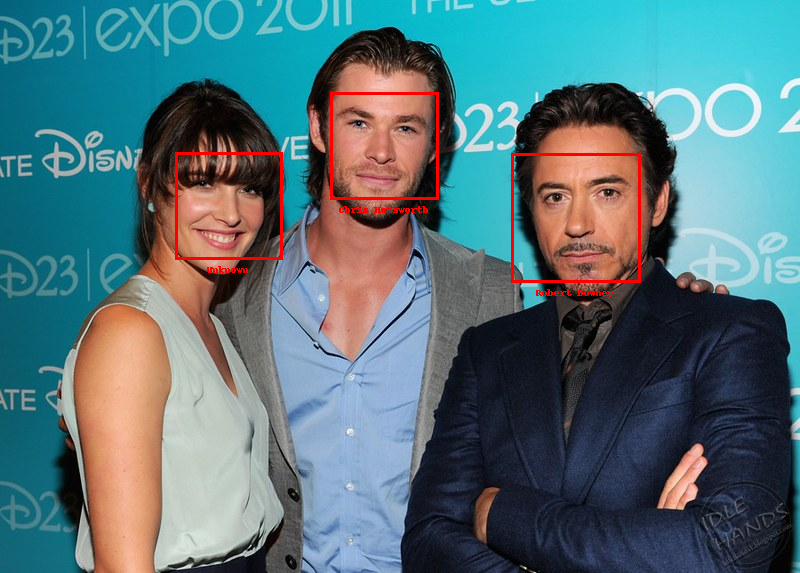

<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


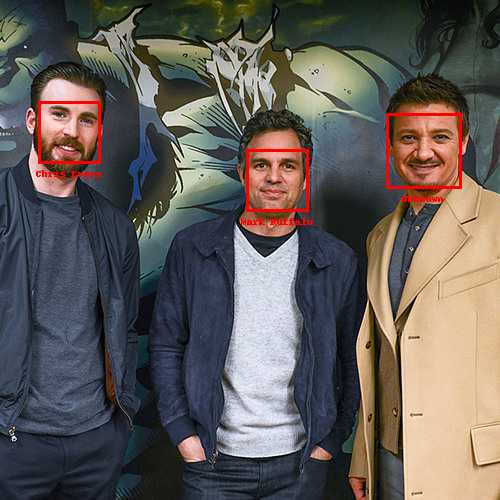

<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


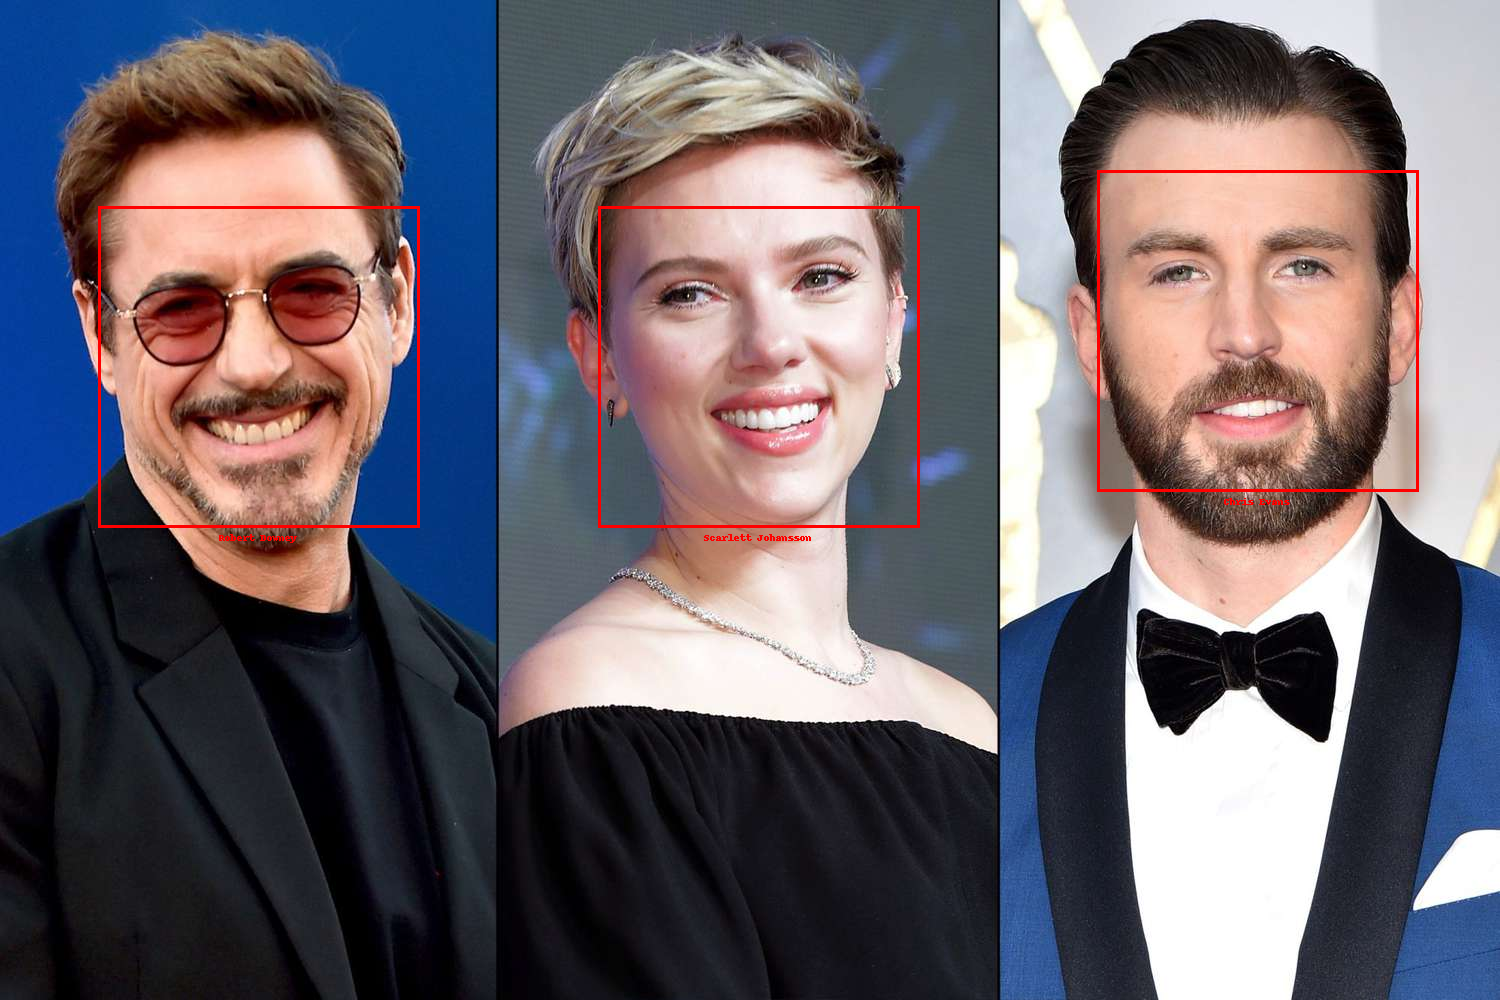

<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead

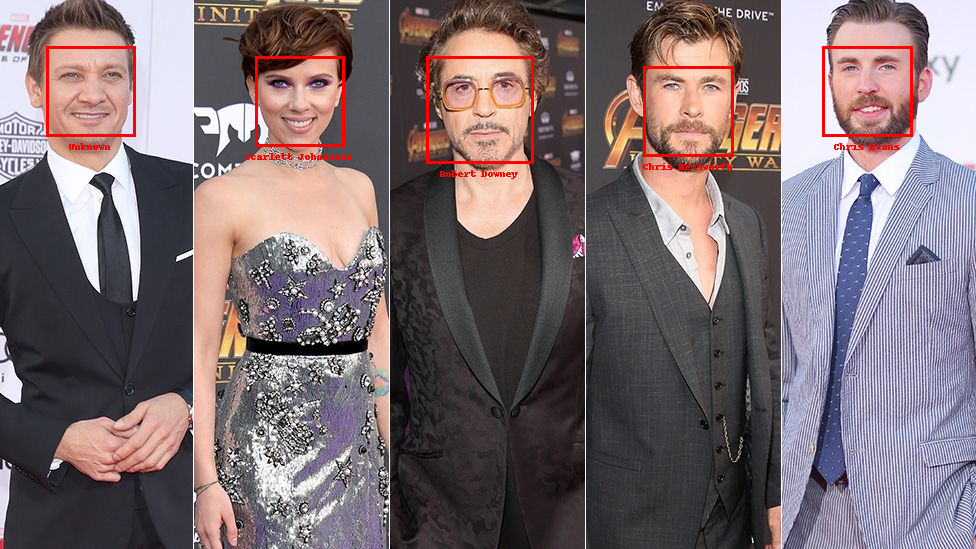

<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-17-837791afc3cc>:44: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


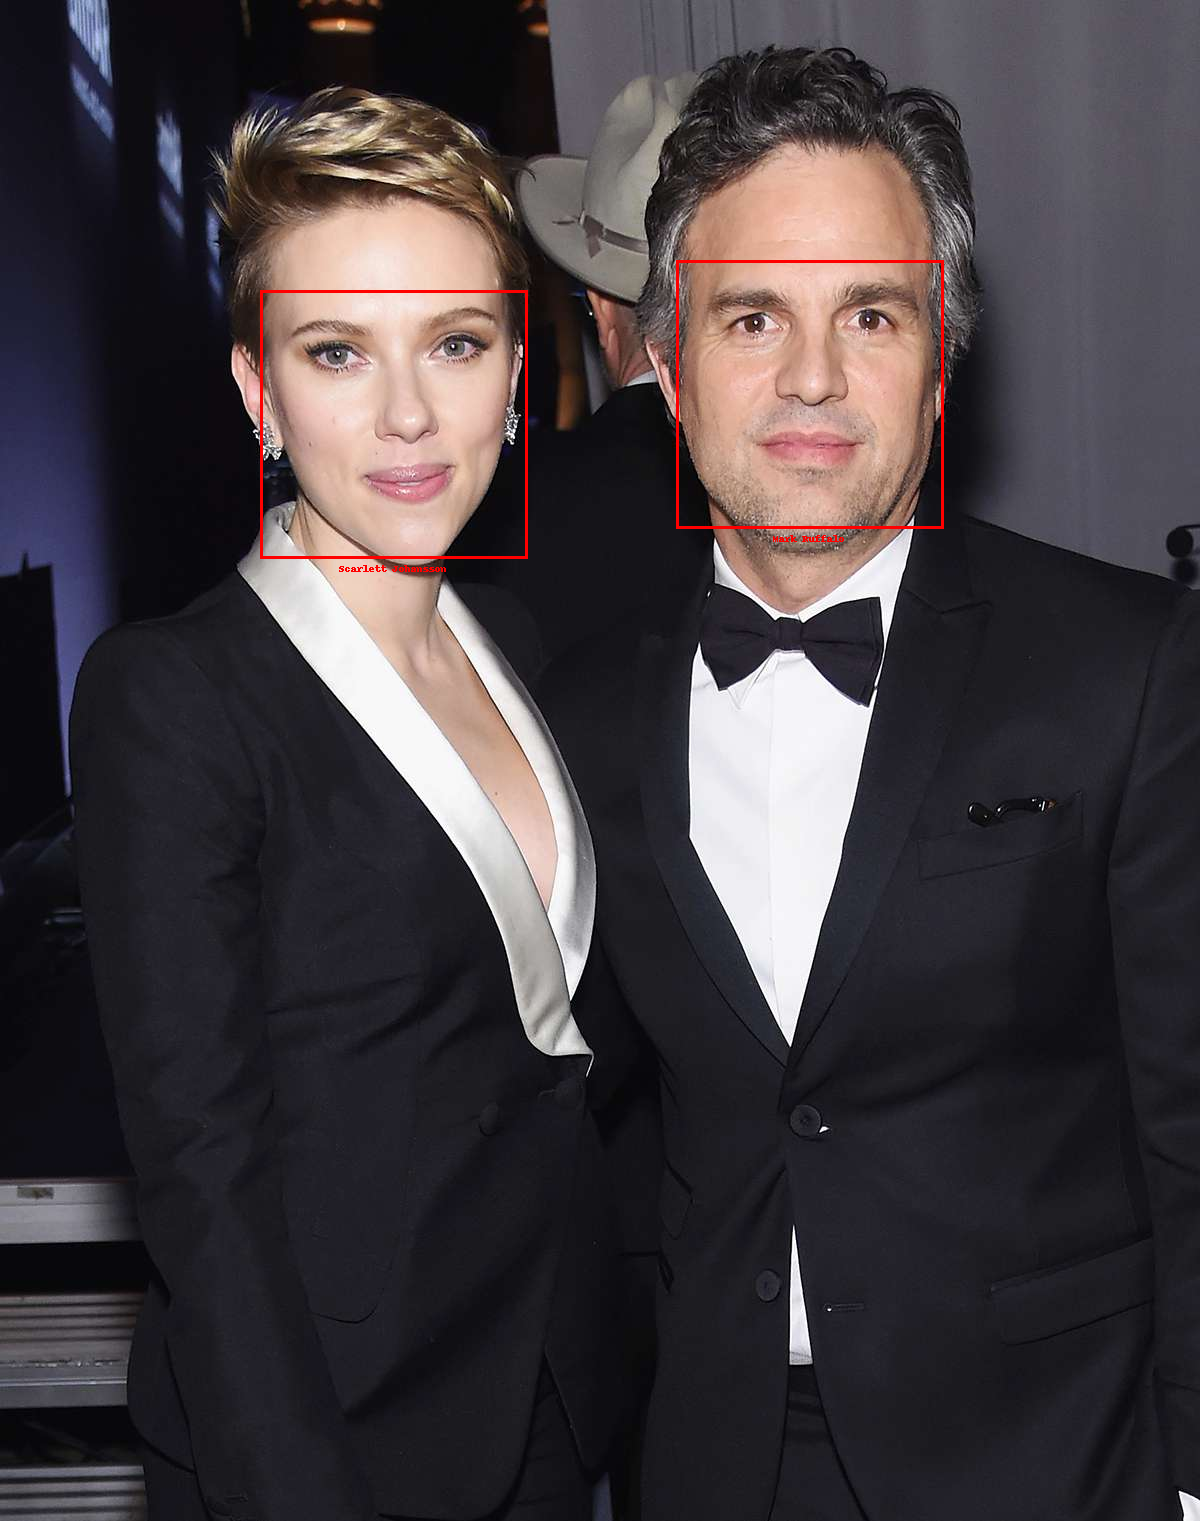

In [ ]:
import os
import face_recognition
from PIL import Image, ImageDraw, ImageFont


# Putanja do foldera s slikama
images_folder = 'AVENGERS_FaceDetection/face_recognition'

# Prolazak kroz sve slike u folderu
for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):

        # Učitavanje slike
        unknown_picture = face_recognition.load_image_file(os.path.join(images_folder, filename))

        # Pronalaženje svih lica na slici
        face_locations = face_recognition.face_locations(unknown_picture)
        face_encodings = face_recognition.face_encodings(unknown_picture, face_locations)

        # Slika se konvertuje u PIL-format da bi se uspešno iscrtavao pravougaonik na njoj uz pomoć Pillow biblioteke
        pil_picture = Image.fromarray(unknown_picture)

        # Pravljenje instance za uspešno crtanje
        draw = ImageDraw.Draw(pil_picture)

        # Izlistavanje svakog lica na nepoznatoj slici
        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            # Provera podudaranja lica sa slike sa licima iz baze
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            name = "Unknown"

            # Ili umesto toga se koristi poznato lice sa najmanjom distancom od novog lica
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
            # Iscrtavanje pravougaonika oko detektovanog lica
            line_width = 3

            draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0), width=line_width)

           # Ispisivanje imena ispod detektovanog lica
            text_width, text_height = draw.textsize(name)
            draw.text((left + (right - left - text_width) // 2, bottom + 5), name, fill=(255, 0, 0, 255))

            # Ispisivanje imena ispod detektovanog lica
           # text_bbox = draw.textbbox((left, bottom - 10), name)
            #text_width = text_bbox[2] - text_bbox[0]
            #text_height = text_bbox[3] - text_bbox[1]
            #draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(255, 0, 0), outline=(255, 0, 0))
            #draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

        # Uklanjanje biblioteke crteža iz memorije
        del draw

        # Prikazivanje rezultata slike
        display(pil_picture)


# **Rezultati i diskusija**

U okviru ovog rada, važno je naglasiti da su modeli testirani na fotografijama koje su prilagođene za ovakav zadatak, smanjene su tako da prikazuju samo lice, koje je usmereno prema kameri. Ipak, zbog ograničenog broja fotografija za testiranje, može biti izazovno uočiti značajne razlike između korišćenih modela.

Analizirajući dobijene reultate, moglo se uočiti sledeće:

HOG model detekcije daje pristojne rezultate sa malim skupom podataka i jednostavan je za implementaciju, međutim da bi postigao veću preciznost potrebno ga je trenirati na većem skupu podataka. Tako da je u odnosu na složenije metode manje precizan, posebno u uslovima varijacija osvetljenja i pozadine, što predstavlja nedostatak. U ovom projektu, koriščenjem ovog modela dobili su se očekivani rezultati, odnosno na dobar način je detektovano lice.

Haar cascade model pokazao se kao dobar model, međutim uočeni nedostaci su neprilagodljivost modela i nepreciznost. U okviru modela postoji jasno definisan način određivanja objekata na slikama, što dovodi do neprilagođenosti. Slike se uvek pretražuju sa unapred određenim veličinama prozora za pretraživanje te ako ne detektuje objekat unutar takvog prozora, neće ga prihvatiti. Kada je reč o nepreciznosti modela ona podrazumeva da postoji mogućnost da se pronađe objekat na slici koji ne predstavlja lice, ali zadovoljava definisane uslove.
Naravno uočene su i prednosti a to je da je vreme za treniranje jednog ovakvog modela dosta kraće nego kod drugih modela dubokog učenja (jer je potrebno manje podataka).  Druga velika prednost je brzina modela tokom upotrebe, on vraća rezultate znatno brže nego moderni pristup te se može koristiti u stvarnom vremenu.

MTCNN model predstavlja primer modernog pristupa detekcije objekata, odnosno lica. Modeli modernog pristupa nastali su kako bi nadomestiti nedostatke klasičnog pristupa, pa je zbog toga najveća prednost MTCNN modela preciznost i prilagodljivost. Spada među najpreciznijim modelima za detekciju objekata koji su dovoljno brzi za korišćenje u stvarnom vremenu. MTCNN model obrađuje sliku u proseku oko 0.4s. Pri analizi jedne slike to nije dugo vrieme, međutim ako bismo koristili model na velikom skupu podataka i fotografija, vrieme izvršavanja obrade bi bilo znatno duže nego kod metoda klasičnog pristupa.

Face Recogniton je pokazao izuzetnu preciznost u prepoznavanju lica, ali uz veći set podataka imao bi sigurno još veću preciznost. Nedostatak jeste što na malom skupu podataka, model može imati ograničenu sposobnost generalizacije, jer neće biti izložen različitim varijacijama lica i osvetljenja.


# **Zaključak**
U ovom radu primenjeni su neki od modela za prepoznavanje odnosno detekciju lica. Pored ovih postoji još metoda i načina za detekciju lica i njegovih elementa koji se u ovom projektu nisu odradili.

Korišćeni su modeli klasičnih metoda HOG i Haar-cascade model, kao i MTCNN model koji je korišćen kao predstavnik modernog pristupa. Pored pomenutih modela, prikazan je proces identifikacije osoba na fotografijama kroz metode i alate biblioteke namenjene specijalno za detekciju (face recognition).

Detekcija lica predstavlja važnu tehnologiju u oblasti veštačke inteligencije sa brojnim praktičnim primenama, uključujući bezbednost, biometriju, sprovođenje zakona i slično. Ovaj rad je istražio različite tehnike i alate za detekciju lica, istražujući njihove prednosti i nedostatke. Detekcija lica se neprekidno razvija, samim tim buduće tehnologije mogu doneti još bolje rezultate i veću preciznost.

# **Literatura**

1. http://www.ftn.uns.ac.rs/ojs/index.php/zbornik/article/view/3000
2. https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
3. https://pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/
4. https://medium.com/mlcrunch/face-detection-using-dlib-hog-198414837945
5. https://notebook.community/vsanca/TSDC/HOGSVM/.ipynb_checkpoints/HOGSVM-checkpoint
6. https://sabbir.dev/article/face-detection-with-opencv-haar-cascade-vs-dlib-hog/
7. https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/


